<a href="https://colab.research.google.com/github/l43lu/NLP_Project_Assignment/blob/master/01_Data_Analyse_and_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stopwordsiso

     |████████████████████████████████| 73 kB 1.5 MB/s 


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import unicodedata as unicode
import random
import stopwordsiso as stopwords

from numpy.random import randint

from IPython.display import display
from datetime import date, datetime, timedelta
pd.set_option("display.max_rows",180)

In [ ]:
import spacy
!python -m spacy download de
nlp = spacy.load('de')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## Load Data from Github

In [ ]:
test  = pd.read_csv('https://raw.githubusercontent.com/tblock/10kGNAD/master/test.csv', sep=';', names=['sub','text_1','text_2'])
train = pd.read_csv('https://raw.githubusercontent.com/tblock/10kGNAD/master/train.csv', sep=';', names=['sub','text'])

## Head insight in test and train data

In [ ]:
train.head()

,sub,text
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"'Erfundene Bilder zu Filmen, die als verloren ..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


In [ ]:
test.head()

,sub,text_1,text_2
0,Wirtschaft,"'Die Gewerkschaft GPA-djp lanciert den ""All-in...",dazu gehörten auch regelmäßige Valorisierunge...
1,Sport,Franzosen verteidigen 2:1-Führung – Kritische ...,NaN
2,Web,'Neues Video von Designern macht im Netz die R...,quasi ein Nachtmodus für jede Anwendung verfü...
3,Sport,23-jähriger Brasilianer muss vier Spiele pausi...,NaN
4,International,Aufständische verwendeten Chemikalie bei Gefec...,NaN


In [ ]:
# NaN Values ersetzen mit Empty String
test.fillna('', inplace=True)
train.fillna('', inplace=True)

## Text 1 und Text 2 mergen da sie zu einem Textblock gehören

In [ ]:
test['text'] = test['text_1'] + test['text_2']
test.drop(['text_1','text_2'],inplace=True, axis=1)

In [ ]:
test.head()

,sub,text
0,Wirtschaft,"'Die Gewerkschaft GPA-djp lanciert den ""All-in..."
1,Sport,Franzosen verteidigen 2:1-Führung – Kritische ...
2,Web,'Neues Video von Designern macht im Netz die R...
3,Sport,23-jähriger Brasilianer muss vier Spiele pausi...
4,International,Aufständische verwendeten Chemikalie bei Gefec...


### Analyze Data Types



In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sub     1028 non-null   object
 1   text    1028 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9245 entries, 0 to 9244
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sub     9245 non-null   object
 1   text    9245 non-null   object
dtypes: object(2)
memory usage: 144.6+ KB


In [ ]:
test.describe(include=object)

,sub,text
count,1028,1028
unique,9,1028
top,Panorama,Zeugen hörten Hilferufe – Reanimationsversuche...
freq,168,1


In [ ]:
train.describe(include=object)

,sub,text
count,9245,9245
unique,9,9244
top,Panorama,Der Volltext dieses auf Agenturmeldungen basie...
freq,1510,2


In [ ]:
train["sub"].value_counts()

Panorama         1510
Web              1509
International    1360
Wirtschaft       1270
Sport            1081
Inland            913
Etat              601
Wissenschaft      516
Kultur            485
Name: sub, dtype: int64

In [ ]:
train["sub"].describe()

count         9245
unique           9
top       Panorama
freq          1510
Name: sub, dtype: object

In [ ]:
test["sub"].value_counts()

Panorama         168
Web              168
International    151
Wirtschaft       141
Sport            120
Inland           102
Etat              67
Wissenschaft      57
Kultur            54
Name: sub, dtype: int64

In [ ]:
test["sub"].describe()

count         1028
unique           9
top       Panorama
freq           168
Name: sub, dtype: object

## Visalisierung mit Bar Chart

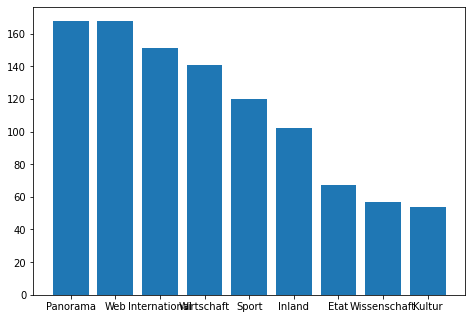

In [ ]:
# Test
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
value_count_test = test["sub"].value_counts()
news_type_list = list(value_count_test.index)
amount_list = list(value_count_test.values)
ax.bar(news_type_list,amount_list)
plt.show()

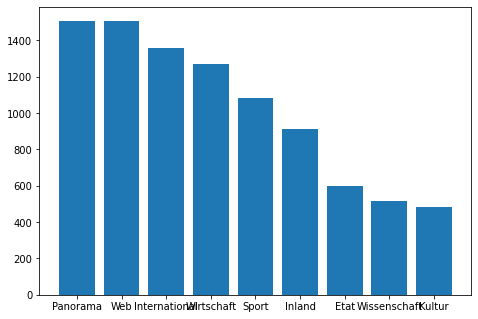

In [ ]:
# Train
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
value_count_train = train["sub"].value_counts()
news_type_list = list(value_count_train.index)
amount_list = list(value_count_train.values)
ax.bar(news_type_list,amount_list)
plt.show()

### Case normalization

Convert text to the same case

In [ ]:
def lower_case(string_):
    return string_.lower()

In [ ]:
test['text'] = test['text'].apply(lower_case)
train['text'] = train['text'].apply(lower_case)

### Remove Stop Words

In [ ]:
de_sw = stopwords.stopwords('de')
def remove_stopwords(text):
    stopwords = list(de_sw)
    querywords = text.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    
    return result

In [ ]:
train['text'] = train['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords)

In [ ]:
test.head()

,sub,text
0,Wirtschaft,"'die gewerkschaft gpa-djp lanciert ""all-in-rec..."
1,Sport,franzosen verteidigen 2:1-führung – kritische ...
2,Web,'neues video designern netz runde – schlagen b...
3,Sport,23-jähriger brasilianer spiele pausieren – ent...
4,International,aufständische verwendeten chemikalie gefechten...


### Remove Digits

In [ ]:
def remove_digits_from_string(_string):
    return ''.join([i for i in _string if not i.isdigit()])

In [ ]:
train['text'] = train['text'].apply(remove_digits_from_string)
test['text'] = test['text'].apply(remove_digits_from_string)

### Remove non alphabetic characters from text

In [ ]:
test['text'] = test['text'].str.replace('[^a-zA-ZäüöÄÜÖß]'," ")
train['text'] = train['text'].str.replace('[^a-zA-ZäüöÄÜÖß]'," ")

### Stemming

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def stemming(_string):
    words = nlp(_string)
    stemmed_string = ""
    for w in words:
        stemmed_string = stemmed_string+" "+w.lemma_
        
    return stemmed_string

In [ ]:
train['stemmed_text'] = train['text'].apply(stemming)

In [ ]:
test['stemmed_text']  = test['text'].apply(stemming)

In [ ]:
train.iloc[4]['text']

'estland sieht künftigen österreichischen präsidenten estnischen staatsbürger  wien tallinn pskow   eltern künftigen bundespräsidenten  sowjets besetzten estland damalige deutsche reich geflohen   wien sascha van bellen welt kam  estnische verwandte jubelten dienstag wahlsieg  freude herrscht politikern landes  interesse van bellen russischen stadt pskow  geburtsstadt eltern  ganzem herzen familie mitgefiebert  irina steinberg  cousine künftigen präsidenten  sonntag stress gewesen  erzählt steinberg telefonat apa  sieg zeugt davon  österreichische intelligenzija  denkenden menschen  sascha gestimmt haben  studierte philologin  dorf süden estlands lebt  freudig wahlsieg ehemaligen grünen chefs estnischen politikern kommentiert  wahl präsidenten estnischen wurzeln schafft günstige bedingungen engere zusammenarbeit estland österreich  erklärt vorsitzende außenpolitischen ausschusses estnischen parlament  sven mikser  estland aufschwung europaskeptischer kräfte sorge beobachte  froh  öster

In [ ]:
train.iloc[4]['stemmed_text']

' estland sehen künftig österreichisch präsidenten estnischen staatsbürger   wien tallinn pskow    eltern künftig bundespräsidenten   sowjets besetzen estland damalige deutsch reichen fliehen    wien sascha van bellen welt kommen   estnische verwandt jubeln dienstag wahlsieg   freude herrschen politikern landes   interesse van bellen russisch stadt pskow   geburtsstadt eltern   ganz herzen familie mitgefiebert   irina steinberg   cousine künftig präsidenten   sonntag stress sein   erzählen steinberg telefonat apa   sieg zeugen davon   österreichisch intelligenzija   denkend menschen   sascha stimmen haben   studieren philologin   dorf süden estlands leben   freudig wahlsieg ehemalig grün chefs estnischen politikern kommentieren   wahl präsidenten estnischen wurzeln schaffen günstige bedingungen eng zusammenarbeit estland österreich   erklären vorsitzend außenpolitisch ausschusses estnischen parlament   sven mikser   estland aufschwung europaskeptischer kräfte sorge beobachten   froh   

In [ ]:
len(train.iloc[4]['text']), len(train.iloc[4]['stemmed_text'])

(3144, 3165)

### Word Cloud Übersicht

In [ ]:
subs_list = list(train['sub'].unique())

Sport


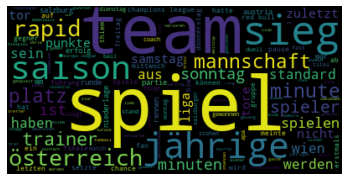

Kultur


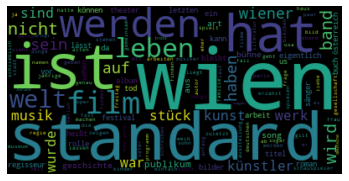

Web


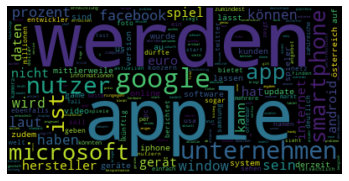

Wirtschaft


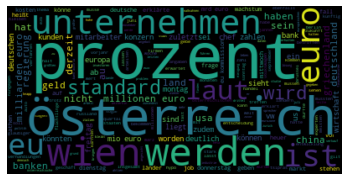

Inland


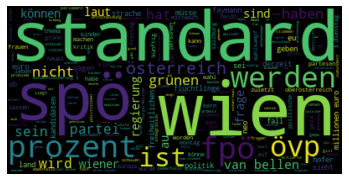

Etat


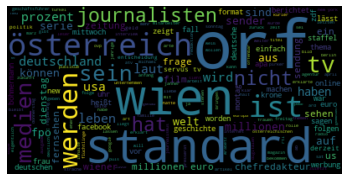

International


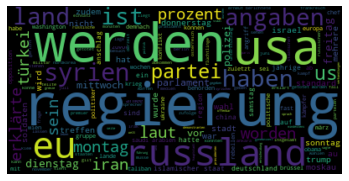

Panorama


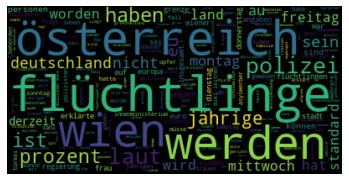

Wissenschaft


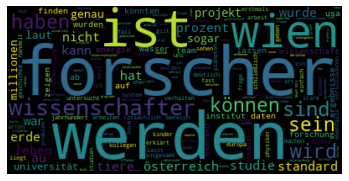

In [ ]:
for sub in subs_list:
  _tmp_df = train[train['sub'] == sub]
  print(sub)
  text      = " ".join(review for review in _tmp_df['text'].astype(str))
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()





### Save to CSV

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/augmented_data/preprocessed_train.csv', 'w') as f:
  train.to_csv(f, sep=',', index=False) 

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/augmented_data/preprocessed_test.csv', 'w') as f:
  test.to_csv(f, sep=',', index=False) 